This notebook creates an AOI over which GUNWs will be generated. Once an AOI is serialized, the AOI is used in the subsequent enumeration workflow. In this case, we are focused on the coastal US excluding Alaska and Hawaii. It is important to name an AOI descriptively both so it can be identified for later use and since the AOI name will be used to group job submissions to Hyp3.

In [5]:
import geopandas as gpd
from shapely.geometry import box

# Create Coastal US geojson

We are going to do the operations to get our geojson:

- read public US state data
- select coastal states

In [3]:
df_us = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json')
df_us.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


Select states manually.

<Axes: >

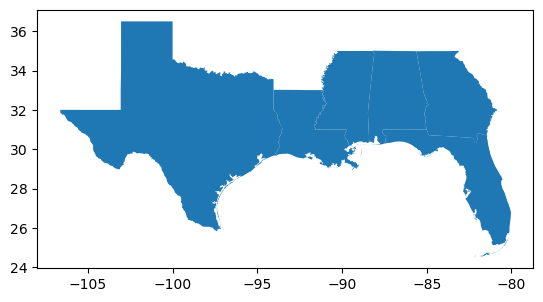

In [10]:
coastal_states = ['Texas', 
                  'Louisiana', 
                  'Mississippi',
                  'Alabama',
                  'Florida',
                  'Georgia']

df_us_coast = df_us[df_us.NAME.isin(coastal_states)].reset_index(drop=True)
df_us_coast.plot()

In [11]:
aoi = box(-101, 23.8, -81, 32.9)

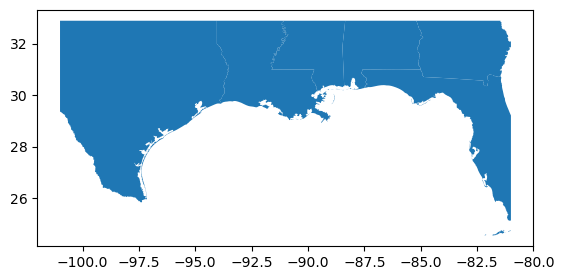

In [15]:
df_us_coast.clip(aoi).plot()
#df_us_coast = df_us_coast.clip(aoi) 

# Serialize

In [16]:
df_us_coast.to_file('../AOIs/conus_gulf_coast.geojson', driver='GeoJSON')